<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2016/17</h2>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<h3>Basic network analysis with NetworkX, assortativity, resilience to attacks</h3>
<hr>
</center>

In [1]:
import networkx as nx
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Measure the connectivity and clustering of a graph

In [3]:
G=nx.Graph()

In [4]:
#Download the network file 'ca-AstroPh' from SNAP@Stanford
fh=open('./ca-AstroPh.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    if s[0]!='#':
        origin=int(s[0])
        dest=int(s[1])
        G.add_edge(origin,dest)
fh.close()

In [5]:
print ("The graph has", len(G), "nodes")
print ("and",len(G.edges()),"edges")

The graph has 18772 nodes
and 198110 edges


In [6]:
print ("Is the graph simply connected?", nx.is_connected(G))

Is the graph simply connected? False


### Show the components of the graph

In [7]:
print ("The graph has", nx.number_connected_components(G),"connected components")

The graph has 290 connected components


In [8]:
for k in nx.connected_components(G):
    print (len(k))

17903
2
3
4
8
2
2
4
3
5
3
3
2
2
5
5
2
7
2
3
10
3
4
4
4
2
2
3
6
4
2
4
2
3
2
2
5
4
6
2
2
5
3
2
2
2
2
4
3
2
4
2
3
3
2
3
3
2
3
3
5
3
2
3
5
3
2
3
2
2
3
2
3
4
3
3
3
3
2
5
2
4
2
4
10
2
3
3
3
4
3
2
3
2
2
3
5
2
3
2
3
2
3
2
3
9
2
3
4
3
4
3
3
5
5
2
3
2
2
2
2
2
2
2
3
4
2
2
2
2
2
3
3
2
3
2
2
4
2
2
4
4
3
3
2
2
3
3
3
2
3
2
2
2
2
4
3
2
12
2
3
8
3
2
2
7
4
3
3
2
2
2
2
3
2
3
2
2
3
2
2
3
2
4
2
2
2
2
2
2
2
3
3
2
2
2
4
2
3
2
3
2
4
2
4
2
4
4
2
5
2
2
2
3
2
4
2
2
3
3
3
3
8
2
3
2
2
3
2
2
2
2
4
1
3
2
2
2
2
3
2
2
3
2
2
2
2
3
2
2
5
2
4
2
6
18
3
2
3
3
2
2
3
4
2
2
4
3
3
4
7
5
2
3
3
2
2
4
2
4
2
2
2
2
2
2
2
3
2
2


### Extract the largest Connected Component as a subgraph

In [9]:
nx.connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x7f1dbf6ff308>

In [10]:
graphs = list(nx.connected_component_subgraphs(G))

In [11]:
graphs

In [12]:
H=graphs[0]

In [13]:
print (len(G)-len(H))

869


In [14]:
print ("Check that the graph is now connected")
nx.number_connected_components(H)

Check that the graph is now connected


1

## Global clustering coefficient

The global clustering coefficient measures the number of triangles in the network. 

In [15]:
nx.triangles(G)

{84424: 210,
 276: 54,
 1662: 218,
 5089: 1,
 6058: 918,
 6229: 107,
 10639: 820,
 16442: 137,
 19325: 828,
 19834: 3,
 20113: 44,
 21937: 13,
 25452: 1906,
 26902: 3,
 29829: 11,
 30222: 506,
 32432: 128,
 33040: 2759,
 39238: 16,
 39521: 1793,
 41418: 487,
 45009: 2384,
 45098: 189,
 45242: 702,
 47005: 27,
 47968: 5646,
 47999: 148,
 49934: 360,
 50220: 44,
 50897: 1594,
 51730: 1,
 53681: 23,
 57537: 10,
 58458: 10,
 59326: 158,
 61571: 354,
 63552: 934,
 64124: 76,
 64568: 1587,
 66200: 73,
 69839: 101,
 72391: 11,
 73543: 537,
 76259: 205,
 77098: 423,
 77915: 8,
 78627: 396,
 83560: 1145,
 85420: 236,
 88768: 15,
 89131: 6,
 89308: 117,
 89994: 72,
 90506: 121,
 91060: 236,
 92387: 32,
 93296: 143,
 94138: 513,
 94329: 113,
 95070: 11,
 95531: 285,
 96570: 114,
 97101: 32,
 98506: 491,
 99104: 3003,
 104802: 1907,
 106611: 526,
 107829: 412,
 109016: 29,
 112605: 623,
 117751: 41,
 122908: 295,
 124023: 89,
 125190: 1,
 130825: 42,
 132445: 1246,
 560: 3,
 15829: 50,
 42972: 100

How many triangles there are in the whole network?

In [18]:
float(sum(list(nx.triangles(G).values())))/3

1351441.0

The global clustering coefficient is 
<center>
$C_\Delta = \frac{3 \times \text{triangles}}{\text{triplets}}$
</center>

In [19]:
nx.transitivity(G)

0.3180015812533629

## Average clustering coefficient
As an alternative to the global clustering coefficient, the overall level of clustering in a network is measured by Watts and Strogatz as the average of the local clustering coefficients of all the vertices $n$:

<center>
$\bar{C} = \frac{1}{n}\sum_{i=1}^{n} C_i.$
</center>

It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. In fact, a weighted average where each local clustering score is weighted by $k_i(k_i-1)$ is identical to the global clustering coefficient.

In [20]:
print ("The average clustering coefficient of G is")
nx.average_clustering(G)

The average clustering coefficient of G is


0.6305932411707943

## Average shortest path length
#### Warning! Calculating the shortest paths is intensive! 

The graph is small world.

In [21]:
nx.average_shortest_path_length(H)

4.194011768617203

In [22]:
math.log(len(G))

9.840121676914308

### Compare the results with a random ER network

We generate a random Erdos-Renyi graph with same average connectivity of H.

In [23]:
nnodes=18000
plink=0.00122

ER=nx.fast_gnp_random_graph(nnodes, plink)

In [24]:
nx.is_connected(ER)

True

In [26]:
print ("The ER graph has", len(ER), "nodes")
print ("and",len(ER.edges()),"edges")

The ER graph has 18000 nodes
and 197519 edges


In [27]:
print ("The average clustering coefficient of ER is")
nx.average_clustering(ER)

The average clustering coefficient of ER is


0.0012088225099030822

In [28]:
print (float(sum(list(nx.triangles(ER).values())))/3)

1766.0


The ER graph is also small world.

In [29]:
nx.average_shortest_path_length(ER)

3.5206575797420845

### Compare the results with a random AB network

In [31]:
AB=nx.barabasi_albert_graph(18000,11)

In [32]:
print ("The AB graph has", len(AB), "nodes")
print ("and",len(AB.edges()),"edges")

The AB graph has 18000 nodes
and 197879 edges


In [36]:
from collections import Counter 
degrees=list(AB.degree().values())
c=Counter(degrees)

In [37]:
import powerlaw as pwl

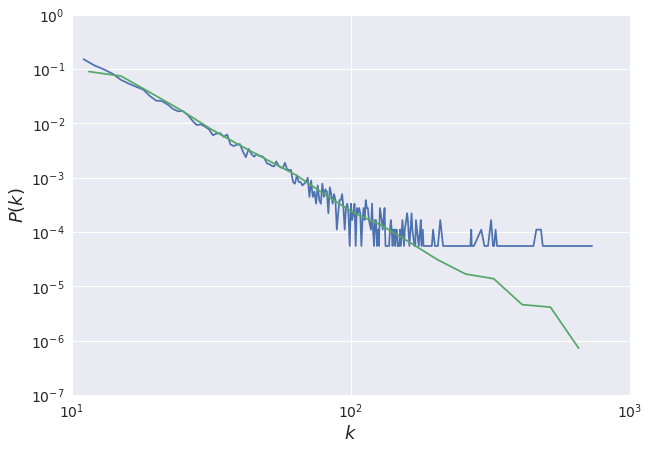

In [38]:
plt.figure(figsize=(10,7))
x=[]
y=[]
for i in sorted(c):   
    x.append(i)
    y.append(float(c[i])/len(AB))

    
plt.plot(np.array(x),np.array(y))
pwl.plot_pdf(degrees)

plt.xlabel('$k$', fontsize=18)
plt.ylabel('$P(k)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([10,1000,0.0000001,1])
plt.show()

In [39]:
fit_function = pwl.Fit(degrees, xmin=11)

/home/carlo/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [40]:
fit_function.power_law.alpha

/home/carlo/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


3.0526154625039936

In [41]:
fit_function.power_law.sigma

0.015299292352753669

In [42]:
fit_function.power_law.xmin

11.0

In [43]:
print ("The average clustering coefficient of AB is")
nx.average_clustering(AB)

The average clustering coefficient of AB is


0.007404411835038909

In [44]:
print ("The number of triangles is ", float(sum(list(nx.triangles(AB).values())))/3.0)

The number of triangles is  22574.0


The AB network is small world

In [45]:
nx.average_shortest_path_length(AB)

3.13407395472588

### Compare the results with a random WS network

In [46]:
WS=nx.connected_watts_strogatz_graph(18000,23,0.2,50)

In [47]:
print ("The WS graph has", len(WS), "nodes")
print ("and",len(WS.edges()),"edges")

The WS graph has 18000 nodes
and 198000 edges


In [48]:
nx.is_connected(WS)

True

In [49]:
ws_degrees=list(WS.degree().values())

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.]), <a list of 9 Text yticklabel objects>)

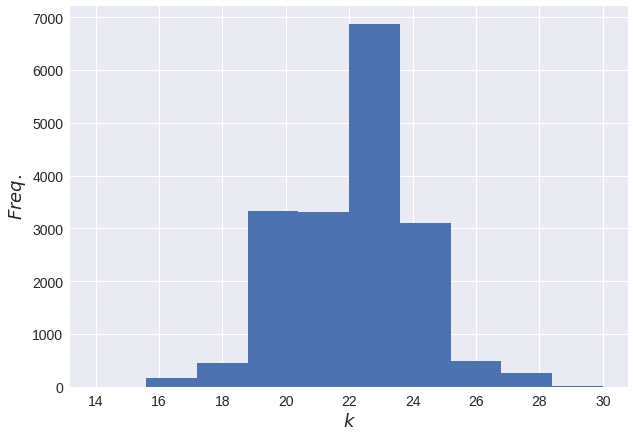

In [50]:
plt.figure(figsize=(10,7))
plt.hist(ws_degrees, bins=10)
plt.xlabel('$k$', fontsize=18)
plt.ylabel('$Freq.$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [51]:
print ("The average clustering coefficient of WS is")
nx.average_clustering(WS)

The average clustering coefficient of WS is


0.3695840973874992

In [52]:
nx.average_shortest_path_length(WS)

4.03575967183362

## Closeness Centrality

In connected graphs there is a natural distance metric between all pairs of nodes, defined by the length of their shortest paths. 
The '''farness''' of a node ''x'' is defined as the sum of its distances from all other nodes, and its closeness was defined by Bavelas as the reciprocal of the farness that is:


<center>
$C(x)= \frac{1}{\sum_y d(y,x)}.$
</center>


Thus, the more central a node is the lower its total distance from all other nodes. Note that taking distances ''from'' or ''to'' all other nodes is irrelevant in undirected graphs, whereas in directed graphs distances ''to'' a node are considered a more meaningful measure of centrality, as in general (e.g., in, the web) a node has little control over its incoming links.


#### Be careful! Computing all the distances between pair of nodes can be intensive.

In [53]:
close_centr=nx.closeness_centrality(G)

In [54]:
print (close_centr)

{84424: 0.29143162289216096, 276: 0.2610825182052537, 1662: 0.2768661855076437, 5089: 0.22535050348474, 6058: 0.2931580246143367, 6229: 0.27250459188728965, 10639: 0.29973017442355177, 16442: 0.27194033728102124, 19325: 0.2986448983804922, 19834: 0.235548062242379, 20113: 0.2682529961900883, 21937: 0.24865255225542662, 25452: 0.30098246267984763, 26902: 0.22549634407790312, 29829: 0.24941172459628888, 30222: 0.28993700022950036, 32432: 0.28044531275997236, 33040: 0.31822762288707307, 39238: 0.2510141610996421, 39521: 0.3014128627129856, 41418: 0.2583252162971972, 45009: 0.30248086945493513, 45098: 0.27342104311955473, 45242: 0.2854577862483591, 47005: 0.24676933810563192, 47968: 0.3163466777008404, 47999: 0.2679456707656171, 49934: 0.2871573969912937, 50220: 0.27091764829442017, 50897: 0.3045799695926208, 51730: 0.22324368047692614, 53681: 0.23943945299087524, 57537: 0.25003632229858613, 58458: 0.23086595804787308, 59326: 0.27904730314321324, 61571: 0.2889018088145652, 63552: 0.3005638

## Measure the assortativity of the network

Assortativity can be measured in different ways. A simple approach is measuring the average nearest neighbor degree to assess the level of degree-assortativity.

In [55]:
from collections import defaultdict

In [56]:
x=[]
y=[]

avg_knn=defaultdict(list)

for n in G.nodes():
    k=G.degree(n)
    
    nn=len(G.neighbors(n))
    total=0
    for j in G.neighbors(n):
        total+=G.degree(j)
    
    avg_knn[k].append(float(total)/nn)
    
    x.append(k)
    y.append(float(total)/nn)

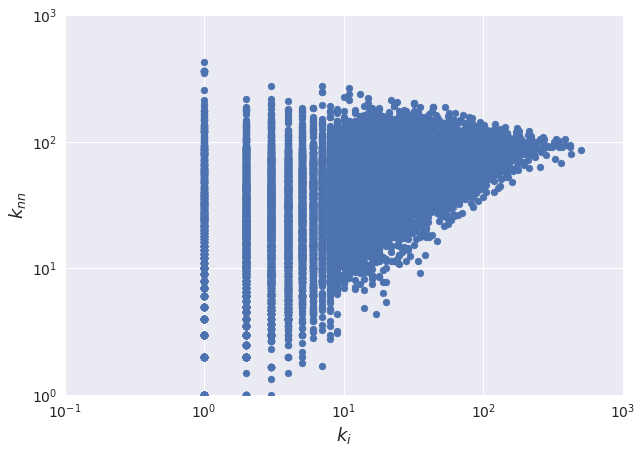

In [57]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)

plt.xlabel('$k_i$', fontsize=18)
plt.ylabel('$k_{nn}$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1,1000,1,1000])
plt.show()

In [62]:
z=[]
for k in avg_knn:
    knn=np.array(avg_knn[k])
    z.append(np.average(knn))
    #print k, np.average(knn)

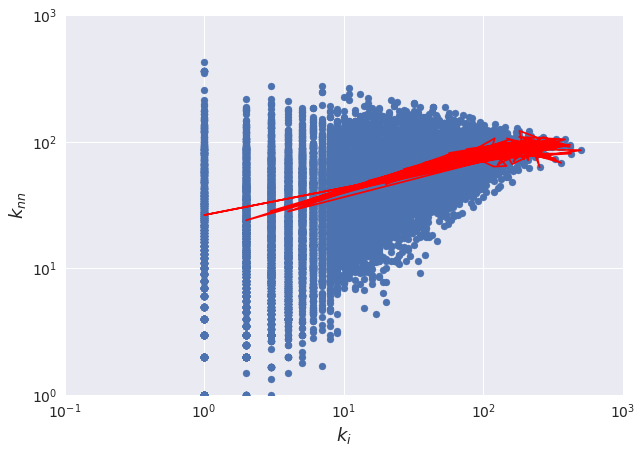

In [63]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(list(avg_knn.keys()),z, color='r')

plt.xlabel('$k_i$', fontsize=18)
plt.ylabel('$k_{nn}$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1,1000,1,1000])
plt.show()

In [64]:
r=nx.degree_assortativity_coefficient(G)

In [65]:
print (r)

0.205120678986


The degree assortativity coefficient of a ER graph is much smaller.

In [66]:
ERr=nx.degree_assortativity_coefficient(ER)

In [67]:
ERr

-0.00023544329422853254

NetworkX offers a number of functions to compute the same quantity.

In [68]:
knn_avg2=nx.average_degree_connectivity(G)

In [70]:
print (knn_avg2)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [71]:
knn_avg3=nx.k_nearest_neighbors(G)

In [73]:
print (knn_avg3)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [75]:
r2=nx.degree_pearson_correlation_coefficient(G)
print (r2)

0.205120678986


# Random and targeted attacks to a network

Resilience is the ability to provide and maintain an acceptable level of service in the face of faults and challenges to normal operation. Threats and challenges for services can range from simple misconfiguration over large scale natural disasters to targeted attacks.

We define a function that performs a random or targeted attack to a network according to a given strategy (random, degree based, betweenness based, etc. )

In [76]:
def net_attack(graph, ranked_nodes):
    
    fraction_removed=[]#here we store the tuples: (%removed nodes, size of gcc)
    
    graph1=graph.copy()
    nnodes=len(ranked_nodes)
    n=0    
    
    gcc=list(nx.connected_components(graph1))[0]
    
    gcc_size=float(len(gcc))/nnodes
    
    fraction_removed.append( (float(n)/nnodes, gcc_size) )
    
    while gcc_size>0.01:
        
        #we start from the end of the list!
        graph1.remove_node(ranked_nodes.pop())

        gcc=list(nx.connected_components(graph1))[0]
        gcc_size=float(len(gcc))/nnodes
        n+=1
        fraction_removed.append( (float(n)/nnodes, gcc_size) )
    
    return fraction_removed

## Random attack

In [77]:
G=nx.Graph()
fh=open('./USairport_2010.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()    

In [78]:
airport_nodes=G.nodes()
resilience_random=net_attack(G, airport_nodes)

## Betweenness based attack

In [79]:
from operator import itemgetter

In [81]:
airport_nodes_betw=[]

betw=nx.betweenness_centrality(G)
for i in sorted(betw.items(), key=itemgetter(1)):
    airport_nodes_betw.append(i[0])


resilience_betw=net_attack(G, airport_nodes_betw)

## Degree based attack

In [82]:
airport_nodes_degree=[]

deg=G.degree()
for i in sorted(deg.items(), key=itemgetter(1)):
    airport_nodes_degree.append(i[0])


resilience_deg=net_attack(G, airport_nodes_degree)

Let's compare the results.

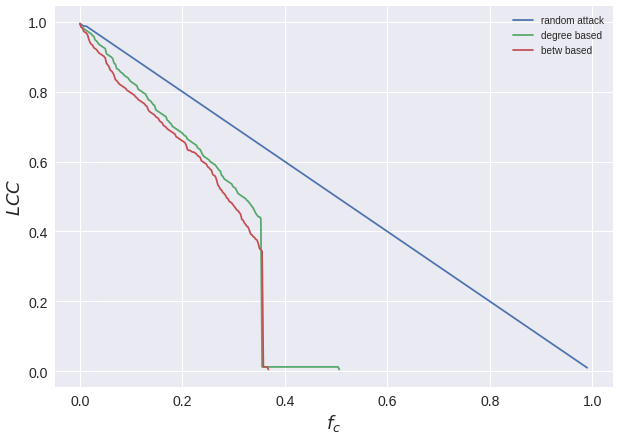

In [83]:
x=[k[0] for k in resilience_random]
y=[k[1] for k in resilience_random]

x1=[k[0] for k in resilience_deg]
y1=[k[1] for k in resilience_deg]

x2=[k[0] for k in resilience_betw]
y2=[k[1] for k in resilience_betw]

plt.figure(figsize=(10,7))

plt.plot(x,y, label='random attack')
plt.plot(x1,y1, label='degree based')
plt.plot(x2,y2, label='betw based')

plt.xlabel('$f_{c}$', fontsize=18)
plt.ylabel('$LCC$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper right')

## Resilience of the Erdos-Renyi random network


In [84]:
ER=nx.fast_gnp_random_graph(2000,0.012)

In [86]:
ER_nodes=ER.nodes()

ER_nodes_deg=[]
for i in sorted(ER.degree().items(), key=itemgetter(1)):
    ER_nodes_deg.append(i[0])

ER_nodes_betw=[]
ER_betw=nx.betweenness_centrality(ER)
for i in sorted(ER_betw.items(), key=itemgetter(1)):
    ER_nodes_betw.append(i[0])


In [87]:
resilience_random=net_attack(ER, ER_nodes)
resilience_deg=net_attack(ER, ER_nodes_deg)
resilience_betw=net_attack(ER, ER_nodes_betw)

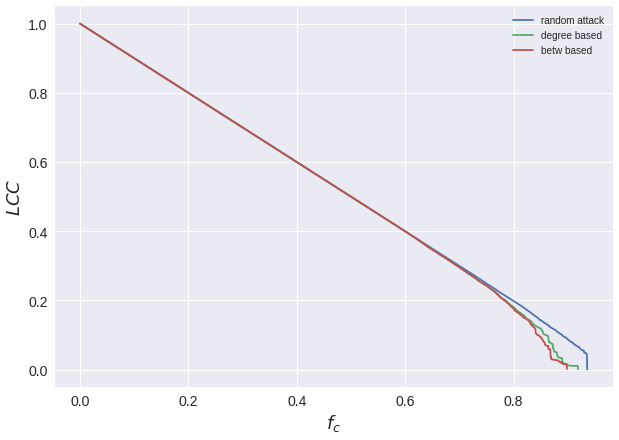

In [88]:
x=[k[0] for k in resilience_random]
y=[k[1] for k in resilience_random]

x1=[k[0] for k in resilience_deg]
y1=[k[1] for k in resilience_deg]

x2=[k[0] for k in resilience_betw]
y2=[k[1] for k in resilience_betw]

plt.figure(figsize=(10,7))

plt.plot(x,y, label='random attack')
plt.plot(x1,y1, label='degree based')
plt.plot(x2,y2, label='betw based')

plt.xlabel('$f_{c}$', fontsize=18)
plt.ylabel('$LCC$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper right')